In [1]:
# prepare text file as corpus (lower case, remove stopwords)
import os
import math
import re # regex
import numpy as np
#import scipy.sparse as sp

def read1k():
    return f.read(1024)

def process_data(chunk, text):
    #print('processed: {0}'.format(ctr))
    text.append(unicode(chunk, errors='ignore')) # 'utf8' codec can't decode byte 0xc3

def rmsword(corpus, stopwords): # remove stopwords from corpus
    i = 0
    for elem in corpus:
        for sword in stopwords:
            if elem == sword:
                while True:
                    try:
                        corpus.remove(elem) # this throws an error if elem not in corpus (might have been removed already)
                        i += 1
                    except:
                        break
    return i # returns number of stopwords removed

if __name__=="__main__":
    # read corpus
    os.chdir('C:\Users\Bernie\Documents\ML4D\lrgtxt0')
    #f = open('vcpos.txt')
    #f = open('todinvenedig.txt')
    #f = open('todinvenedigshrt.txt') # shorter version for tests
    #f = open('DUO-AIBaseRaw-08Feb18.txt')
    #f = open('AbstractsFull.txt')
    f = open('AbstractsFull2012.txt')
    text = []
    for piece in iter(read1k, ''):
        process_data(piece, text)
    
    corpus = []
    for elem in text:
        corpus += elem.split() # splits on all whitespaces
    corpus = [t.lower() for t in corpus] # convert to lower case
    
    # remove special characters
    corpus = [re.sub(r'[^\w]', ' ', t) for t in corpus]
    
    # remove digits
    corpus = [re.sub(r'\b\d+\b', '', t) for t in corpus]
    
    #print corpus
    
    text = []
    # get stopwords
    #f = open('gerstopw0.txt') # German stopwords
    f = open('englstopwrds.txt') # English stopwords
    for piece in iter(read1k, ''):
        process_data(piece, text)
    stopwrds = []
    for elem in text:
        stopwrds += elem.split()
    stopwrds = [t.lower() for t in stopwrds]
    #print stopwrds
    
    #print('length of corpus: {0}'.format(len(corpus)))
    print rmsword(corpus, stopwrds) # remove stopwords from corpus
    #print('length of corpus: {0}'.format(len(corpus)))
    
    # save corpus as separate file
    fout = open('bsc_corpus0.txt', 'w')
    fout.write(' '.join(corpus)) # requires a string
    fout.close()

1548


In [1]:
# import modules and set up logging
from gensim.models import word2vec
import logging
import os

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# load up unzipped corpus from http://mattmahoney.net/dc/text8.zip
os.chdir('C:\Users\Bernie\Documents\ML4D\lrgtxt0')
sentences = word2vec.Text8Corpus('bsc_corpus0.txt')
# train the skip-gram model; default window=5
model = word2vec.Word2Vec(sentences, size=150)
# ... and some hours later... just as advertised...
#print model.most_similar(positive=['a', 'b'], negative=['c'], topn=1)
 
# pickle the entire model to disk, so we can load&resume training later
#model.save('todvenshrt0.model')
# store the learned weights, in a format the original C tool understands
#model.save_word2vec_format('todvenshrt0.model.bin', binary=True)
# or, import word weights created by the (faster) C word2vec
# this way, you can switch between the C/Python toolkits easily
#model = word2vec.Word2Vec.load_word2vec_format('todvenshrt0.bin', binary=True)
 
# "boy" is to "father" as "girl" is to ...?
#print model.most_similar(['a', 't0'], ['b'], topn=3)
    
# which word doesn't go with the others?
#print model.doesnt_match("a b c".split())

# to read out vocabulary
#model.wv.vocab

D:\Anaconda2\lib\site-packages\gensim-3.2.0-py2.7-win-amd64.egg\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
2018-05-09 14:16:55,673 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-05-09 14:16:55,677 : INFO : collecting all words and their counts
2018-05-09 14:16:55,680 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-09 14:16:55,683 : INFO : collected 1075 word types from a corpus of 4592 raw words and 1 sentences
2018-05-09 14:16:55,684 : INFO : Loading a fresh vocabulary
2018-05-09 14:16:55,687 : INFO : min_count=5 retains 190 unique words (17% of original 1075, drops 885)
2018-05-09 14:16:55,687 : INFO : min_count=5 leaves 3366 word corpus (73% of original 4592, drops 1226)
2018-05-09 14:16:55,690 : INFO : deleting the raw counts dictionary of 1075 items
2018-05-09 14:16:55,691 : INFO : sample

In [3]:
print model.wv.most_similar([u'pain'], topn=10)
print model.wv.most_similar([u'depression'], topn=10)

[(u'b', 0.9993299841880798), (u's', 0.999323844909668), (u'fluctuation', 0.9992915987968445), (u'disease', 0.999285101890564), (u'clinical', 0.9992791414260864), (u'p', 0.9992711544036865), (u'parkinson', 0.9992598295211792), (u'diurnal', 0.9992573261260986), (u'patients', 0.9992554187774658), (u'levodopa', 0.9992510080337524)]
[(u'b', 0.9987132549285889), (u'diurnal', 0.998710572719574), (u'p', 0.9986894130706787), (u'levodopa', 0.9986794590950012), (u'disease', 0.9986448287963867), (u'clinical', 0.9986404180526733), (u'h4', 0.9986352920532227), (u's', 0.998630702495575), (u'fluctuation', 0.9986303448677063), (u'parkinson', 0.9986236691474915)]


In [20]:
# co-occurance test large files
import os
import math
import re # regex
import numpy as np
#import scipy.sparse as sp

def read1k():
    return f.read(1024)

def process_data(chunk, text):
    #print('processed: {0}'.format(ctr))
    text.append(unicode(chunk, errors='ignore')) # 'utf8' codec can't decode byte 0xc3
    
def valinlst(val, lst): # checks if value is in a list
    for elem in lst:
        if elem == val:
            #print('valinlst elem: {0} val: {1}'.format(elem, val))
            #re.match( val, elem, re.I)
            return True
    return False

def findphrases(corpus, win2): # returns all phrases from corpus for given window as a list
    i = 0
    phrase = []
    phrases = []
    for elem in corpus:
        if i > -win2-1 and i < len(corpus)-win2:
            for j in range(i-win2,i+win2+1): # for skip-gram we would need to omit the i-value
                phrase.append(corpus[j])
            phrases.append(phrase)
            phrase = []
        #i += 1
        i += ( 2 * win2 + 1 )
    return phrases

def rmsword(corpus, stopwords): # remove stopwords from corpus
    i = 0
    for elem in corpus:
        for sword in stopwords:
            if elem == sword:
                while True:
                    try:
                        corpus.remove(elem) # this throws an error if elem not in corpus (might have been removed already)
                        i += 1
                    except:
                        break
    return i # returns number of stopwords removed

if __name__=="__main__":
    # read corpus
    os.chdir('C:\Users\Bernie\Documents\ML4D\lrgtxt0')
    #f = open('todinvenedig.txt')
    #f = open('todinvenedigshrt.txt') # shorter version for tests
    #f = open('vecsemtst0.txt') # test file with fixed similarities
    f = open('bsc_corpus0.txt') # this file is already preprocessed, symbols and stopwords removed
    
    text = []
    for piece in iter(read1k, ''): # read file
        process_data(piece, text)
    
    corpus = []
    for elem in text:
        corpus += elem.split() # splits on all whitespaces: add text data to corpus
    corpus = [t.lower() for t in corpus] # convert to lower case
    
    # fill words set (unique!) from corpus
    words = set() # words as set: each entry unique
    for elem in corpus:
        words.add(elem)
        
    # todo: for very large datasets: process chunks and save to file in between ********************
        
    print('number of words in corpus (after stopwords removed): {0}'.format(len(words)))
    
    # note: +/- 1-3: syntactic, +/- 4-10: semantic context
    phrases = findphrases(corpus, 4) # extract phrases from corpus (window +/- the given size)
    #print phrases
    print('number of phrases: {0}'.format(len(phrases)))
    
    wordcont = np.zeros((len(words),len(phrases)))
    k = 1.5 # Laplacian smoothing
    
    # fill word-context (or word-phrase) matrix
    i = 0 # word index
    wordlist = []
    for word in words:
        j = 0 # phrease index
        wordlist.append(word) # to allow for index-access later
        for phrase in phrases:
            if valinlst(word, phrase):
                wordcont[i][j] += 1 + k # k for Laplacian smoothing
                #if wordcont[i][j] >= 1.0:
                #    print('wordcont[{0}][{1}]: {2} word: {3} phrease: {4}'.format(i,j,wordcont[i][j],word,phrase))
            j += 1
        i += 1
    
    #print sp.issparse(wordcont)
    #print wordcont
    #print np.nonzero(wordcont)
    #print("word set: {0} word list: {1}".format(next(iter(words)), wordlist[0]))
    
    # calculate pointwise mutual information
    fijsum = 0.0
    pistar = []
    pstarj = []
    for i in range(len(words)):
        pistar.append(0.0)
        for j in range(len(phrases)):
            if i is 0:
                pstarj.append(0.0)
            fijsum += wordcont[i][j]
            pistar[i] += wordcont[i][j]
            pstarj[j] += wordcont[i][j]
    
    #print fijsum
    #print pistar
    #print pstarj
    
    ppmi = np.zeros((len(words),len(phrases))) # init ppmi matrix with 0s
    for i in range(len(words)):
        for j in range(len(phrases)):
            if wordcont[i][j] > 0.0:
                ppmi[i][j] = max(math.log((wordcont[i][j]*fijsum)/pistar[i]/pstarj[j], 2.0), 0.0)
    
    #print ppmi

number of words in corpus (after stopwords removed): 1051
number of phrases: 215


In [21]:
# read out ppmi-matrix and display words and context/phrases
import numpy as np

def getwordi(words, indx): # access words set
    i = 0
    for elem in words:
        if i == indx:
            return elem
        i += 1

print('ppmi mean: {0} and stdev: {1}'.format(np.mean(ppmi), np.std(ppmi)))
print('ppmi max: {0} and min: {1}'.format(np.amax(ppmi), np.amin(ppmi)))

# todo: keep only PMI-entries with values > 2 * length of context (e.g. 2 * 7 = 14)

isigword = [] # index array for significant words
isiphrs = [] # index array for significant words

wcounter = 0
for i in range(len(wordlist)):
    for j in range(len(phrases)):
        if ppmi[i][j] > 0.3: # note limit
            #print('ppmi = {0} for word: {1} and phrase: {2}'.format(ppmi[i][j], wordlist[i], phrases[j]))
            isigword.append(i)
            isiphrs.append(j)
            wcounter += 1
            
print('wcounter - no. of ppmi above limit: {0}'.format(wcounter))

#for i in range(len(isigword)):
for i in range(20):
    print('ppmi {0:.2f} for word: {1} and phrase: {2} idx {3} , {4}'.format(ppmi[isigword[i]][isiphrs[i]], wordlist[isigword[i]], phrases[isiphrs[i]], isigword[i], isiphrs[i]))

ppmi mean: 0.052522468248 and stdev: 0.590914387169
ppmi max: 8.28848161179 and min: 0.0
wcounter - no. of ppmi above limit: 1876
ppmi 7.70 for word: aided and phrase: [u'rapien', u'wirken', u'nms', u'auswahl', u'individuellen', u'device', u'aided', u'therapie', u'hilfreich'] idx 0 , 50
ppmi 6.70 for word: wochen and phrase: [u'wochen', u'monate', u'beginn', u'levodopa', u'therapie', u'basierend', u'zeitliche', u'muster', u'beziehung'] idx 1 , 80
ppmi 7.07 for word: wochen and phrase: [u'wochen', u'andauern', u'anhaltende', u'depression', u'woche', u'lnger', u'anhaltende', u'depression', u'vegetativen'] idx 1 , 203
ppmi 7.70 for word: dynamik and phrase: [u'erklren', u'lsst', u'weitere', u'studien', u'untersuchung', u'zeitliche', u'dynamik', u'angst', u'motorischen'] idx 2 , 172
ppmi 6.70 for word: stren and phrase: [u'parkinson', u'patienten', u'fllen', u'dyskinesien', u'schwerwiegend', u'normale', u'bewegung', u'stren', u'lebensqualitt'] idx 3 , 110
ppmi 6.70 for word: stren and phra

In [22]:
# measure similarity between words for given context/phrases
import numpy as np

def cosine(wordv, wordw): # cosine similarity for two word vectors
    sumv = 0.
    sumw = 0.
    sumvw = 0.
    for elemv, elemw in zip(wordv, wordw):
        #print('for: {0} {1}'.format(elemv, elemw))
        sumv += elemv * elemv
        sumw += elemw * elemw
        sumvw += elemv * elemw
    sumv = math.sqrt(sumv)
    sumw = math.sqrt(sumw)
    #print('{0} {1}'.format(sumv, sumw))
    if sumv > 0. and sumw > 0.:
        return sumvw / sumv / sumw
    else: return -1.

if __name__=="__main__":
    #for i in range(len(isigword)):
        #for j in range(i+1,len(isiphrs)):
    for i in range(10):
        for j in range(i+1,10):
            thiscosine = cosine(ppmi[isigword[i]], ppmi[isigword[j]])
            if thiscosine > 0.1 and wordlist[isigword[i]] != wordlist[isigword[j]]:
                print('cosine {0} and {1}: {2:.3f}'.format(wordlist[isigword[i]], wordlist[isigword[j]], thiscosine))

In [23]:
# Dense vectors - applying SVD
import numpy as np
from scipy import linalg

W, S, C = linalg.svd(ppmi, overwrite_a=True, full_matrices=False)
Sc = np.diag(S)

#print W.shape, Sc.shape, C.shape
#np.allclose(ppmi, np.dot(W, np.dot(Sc, C)))
#np.dot(W, np.dot(Sc, C))

# need to reduce matrices to e.g. 50
k = 50 # number of singular values we want to keep
Cred = C[:k, :]
Sred = Sc[:k, :k]
Wred = W[:, :k]
ppmi_red = np.dot(Wred, np.dot(Sred, Cred))

print('ppmi_red mean: {0} and stdev: {1}'.format(np.mean(ppmi_red), np.std(ppmi_red)))
print('ppmi_red max: {0} and min: {1}'.format(np.amax(ppmi_red), np.amin(ppmi_red)))

ppmi_red mean: 0.049045852587 and stdev: 0.357699780101
ppmi_red max: 7.54989504224 and min: -1.33049926166


In [24]:
# measure similarity between words for given context/phrases
import numpy as np

if __name__=="__main__":
    
    isigword = [] # index array for significant words
    isiphrs = [] # index array for significant words

    wcounter = 0
    for i in range(len(wordlist)):
        for j in range(len(phrases)):
            if ppmi_red[i][j] > 1.0: # note limit
                isigword.append(i)
                isiphrs.append(j)
                wcounter += 1
    
    print wcounter
    
    #for i in range(len(isigword)):
        #for j in range(i+1,len(isiphrs)):
    for i in range(10):
        for j in range(i+1,10):
            thiscosine = cosine(ppmi_red[isigword[i]], ppmi_red[isigword[j]])
            if thiscosine > 0.3 and wordlist[isigword[i]] != wordlist[isigword[j]]:
                print('cosine {0} and {1}: {2:.3f}'.format(wordlist[isigword[i]], wordlist[isigword[j]], thiscosine))

4309


In [25]:
for i in range(20):
    print('ppmi {0:.2f} for word: {1} and phrase: {2} idx {3} , {4}'.format(ppmi[isigword[i]][isiphrs[i]], wordlist[isigword[i]], phrases[isiphrs[i]], isigword[i], isiphrs[i]))

ppmi 0.00 for word: aided and phrase: [u'auslsende', u'moment', u'therapie', u'verndern', u'oft', u'kommt', u'patient', u'ihnen', u'verndert'] idx 0 , 3
ppmi 0.00 for word: aided and phrase: [u'cholinerge', u'pd', u'gestrt', u'fhren', u'neuropsychiatrischen', u'strungen', u'gesamtbelastung', u'nms', u'mp'] idx 0 , 30
ppmi 0.00 for word: aided and phrase: [u'lebensqualitt', u'bei', u'prvalenz', u'nms', u'beziehung', u'lebensqualitt', u'ndert', u'gesamten', u'krankheitsverlaufs'] idx 0 , 36
ppmi 0.00 for word: aided and phrase: [u'apd', u'patienten', u'vs', u'oraler', u'therapie', u'duodopa', u'verhilft', u'verlsslich', u'langanhaltend'] idx 0 , 40
ppmi 7.70 for word: aided and phrase: [u'rapien', u'wirken', u'nms', u'auswahl', u'individuellen', u'device', u'aided', u'therapie', u'hilfreich'] idx 0 , 50
ppmi 0.00 for word: aided and phrase: [u'wochen', u'monate', u'beginn', u'levodopa', u'therapie', u'basierend', u'zeitliche', u'muster', u'beziehung'] idx 0 , 80
ppmi 0.00 for word: aided

In [3]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

import os
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
#from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

def read1k():
    return f.read(1024)

def process_data(chunk, text):
    #print('processed: {0}'.format(ctr))
    text.append(unicode(chunk, errors='ignore')) # 'utf8' codec can't decode byte 0xc3
    
# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
#dataset = fetch_20newsgroups(shuffle=True, random_state=1,
#                             remove=('headers', 'footers', 'quotes'))
#data_samples = dataset.data[:n_samples]
#print("done in %0.3fs." % (time() - t0))

# read corpus
os.chdir('C:\Users\Bernie\Documents\ML4D\lrgtxt0')
#f = open('todinvenedig.txt')
#f = open('todinvenedigshrt.txt') # shorter version for tests
#f = open('vecsemtst0.txt') # test file with fixed similarities
f = open('bsc_corpus0.txt') # this file is already preprocessed, symbols and stopwords removed

text = []
for piece in iter(read1k, ''): # read file
    process_data(piece, text)

data_samples = []
for elem in text:
    data_samples += elem.split() # splits on all whitespaces: add text data to corpus
data_samples = [t.lower() for t in data_samples] # convert to lower case

print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Loading dataset...
done in 0.003s.
Extracting tf-idf features for NMF...
done in 0.017s.
Extracting tf features for LDA...
done in 0.015s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.210s.

Topics in NMF model (Frobenius norm):
Topic #0: disease exploratory effects efficacy ejw emptying entacapone enzyme essential evaluation evolution experience expression disorder extension factors family feature features findings
Topic #1: parkinson years exploratory effects efficacy ejw emptying entacapone enzyme essential evaluation evolution experience expression investigate extension factors family feature features
Topic #2: h4 years experience effects efficacy ejw emptying entacapone enzyme essential evaluation evolution exploratory fmri expression extension factors family feature features
Topic #3: patients years experience effects efficacy ejw emptying entacapone enzyme essential evaluation evolution exploratory investigate expr

In [6]:
# work through topics and find similar concepts
topic0 = [u'fluctuation', u'advanced', u'dementia', u'depression', u'dystonia', u'variability', u'gel', u'pain']
topic1 = [u'movement', u'striatal', u'increased', u'bradykinesia', u'improvement']
topic2 = []
topic3 = []
topic4 = []
topic5 = []
topic6 = []
topic7 = []
topic8 = []
topic9 = ['parkinson', u'nlmcategory', u'conclusion', u'features']
topicX = [u'advanced', u'juvenile', u'dementia', u'depression', u'pain', u'night', u'diurnal']


for top in topicX:
    #print('topic: {0}: {1}'.format(top, model.wv.most_similar([top], topn=5)))
    print('topic: {0}: {1}'.format(top, model.wv.most_similar_cosmul([top], topn=15)))

topic: advanced: [(u'b', 0.9996907711029053), (u's', 0.9996682405471802), (u'parkinson', 0.9996609687805176), (u'levodopa', 0.9996480941772461), (u'fluctuation', 0.9996331930160522), (u'disease', 0.9996317625045776), (u'neurodegenerative', 0.9996232986450195), (u'study', 0.9996163249015808), (u'l', 0.9996100068092346), (u'dystonia', 0.9996089935302734), (u'p', 0.99960857629776), (u'diurnal', 0.9996076822280884), (u'patients', 0.9996050596237183), (u'clinical', 0.9996035695075989), (u'the', 0.9996033906936646)]
topic: juvenile: [(u'parkinson', 0.9997127056121826), (u'fluctuation', 0.9996970891952515), (u'p', 0.9996941089630127), (u'disease', 0.9996925592422485), (u's', 0.9996867179870605), (u'b', 0.9996837377548218), (u'diurnal', 0.9996681809425354), (u'h4', 0.9996650815010071), (u'patients', 0.9996529221534729), (u'levodopa', 0.9996474385261536), (u'study', 0.9996460676193237), (u'disorders', 0.999645471572876), (u'night', 0.9996446967124939), (u'motor', 0.9996405243873596), (u'l', 0.9

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print "Topic %d:" % (topic_idx)
        print " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

no_features = 1000

# NMF is able to use tf-idf
#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
#tfidf = tfidf_vectorizer.fit_transform(documents)
#tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 20

# Run NMF
#nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
people gun state control right guns crime states law police
Topic 1:
time question book years did like don space answer just
Topic 2:
mr line rules science stephanopoulos title current define int yes
Topic 3:
key chip keys clipper encryption number des algorithm use bit
Topic 4:
edu com cs vs w7 cx mail uk 17 send
Topic 5:
use does window problem way used point different case value
Topic 6:
windows thanks know help db does dos problem like using
Topic 7:
bike water effect road design media dod paper like turn
Topic 8:
don just like think know people good ve going say
Topic 9:
car new price good power used air sale offer ground
Topic 10:
file available program edu ftp information files use image version
Topic 11:
ax max b8f g9v a86 145 pl 1d9 0t 34u
Topic 12:
government law privacy security legal encryption court fbi technology information
Topic 13:
card bit memory output video color data mode monitor 16
Topic 14:
drive scsi disk mac hard apple drives controller software port
T

In [3]:
# forward/backward API
import math

def forward(x, y, op): # two scalars and an operation: 0=+, 1=*
    if op == 0: # +
        return x + y
    else: # *
        return x * y

def backward(x, y, op, dz): # two scalars and an operation: 0=+, 1=*
    if op == 0: # +
        return [dz, dz]
    else: # *
        return [y * dz, x * dz]

def numgrad(x, y, op, dz, h): # two scalars and an operation: 0=+, 1=*
    if op == 0: # +
        return [((x+h)+y-(x-h)+y)/(2*h), (x+(y+h)-x+(y-h))/(2*h)]
    else: # *
        return [((x+h)*y-(x-h)*y)/(2*h), (x*(y+h)-x*(y-h))/(2*h)]

if __name__=="__main__":
    print forward(2, 3, 1)
    print backward(2, 3, 1, 1)
    print numgrad(2, 3, 1, 1, 1)

6
[3, 2]
[3, 2]


In [10]:
# download pubmed data
import requests

def getres(url):
    return requests.get(url)

if __name__=="__main__":
    #result = getres('https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=parkinson+AND+motor')
    #result = getres('https://eutils.ncbi.nlm.nih.gov/entrez/eutils/epost.fcgi?db=pubmed&id=29753604,29747823')
    #result = getres('https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?db=pubmed&id=29753604,29747823')
    #result = getres('https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&id=29753604,29747823&rettype=abstract')
    result = getres('https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&id=29753604,29747823&rettype=abstract&retmode=text')
    print result.text


1. Parkinsonism Relat Disord. 2018 May 2. pii: S1353-8020(18)30215-3. doi:
10.1016/j.parkreldis.2018.04.027. [Epub ahead of print]

Markers of impaired motor and cognitive volition in Parkinson's disease:
Correlates of dopamine dysregulation syndrome, impulse control disorder, and
dyskinesias.

Hinkle JT(1), Perepezko K(2), Rosenthal LS(3), Mills KA(3), Pantelyat A(3), Mari 
Z(4), Butala A(5), Moukheiber E(5), Dawson TM(6), Pontone GM(7).

Author information: 
(1)Medical Scientist Training Program, United States; Dept. of Psychiatry and
Behavioral Sciences, United States.
(2)Dept. of Psychiatry and Behavioral Sciences, United States.
(3)Morris K. Udall Parkinson's Disease Research Center, Johns Hopkins University 
School of Medicine, Baltimore, MD, United States; Dept. of Neurology, Johns
Hopkins University School of Medicine, 600 N. Wolfe Street, Meyer 6-181,
Baltimore, MD, United States.
(4)Morris K. Udall Parkinson's Disease Research Center, Johns Hopkins University 
School of Medi

In [1]:
# from https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229
# uncomment if gensim is installed
#!pip install gensim
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

D:\Anaconda2\lib\site-packages\gensim-3.2.0-py2.7-win-amd64.egg\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
import os
os.chdir('C:\Users\Bernie\Documents\ML4D\lrgtxt0')

In [6]:
# load pre-trained word2vec embeddings
# The embeddings can be downloaded from command prompt:
# wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [7]:
# Test the loaded word2vec model in gensim# Test  
# We will need the raw vector for a word
print(model['computer']) 

# We will also need to get the words closest to a word
model.similar_by_word('computer')

[  1.07421875e-01  -2.01171875e-01   1.23046875e-01   2.11914062e-01
  -9.13085938e-02   2.16796875e-01  -1.31835938e-01   8.30078125e-02
   2.02148438e-01   4.78515625e-02   3.66210938e-02  -2.45361328e-02
   2.39257812e-02  -1.60156250e-01  -2.61230469e-02   9.71679688e-02
  -6.34765625e-02   1.84570312e-01   1.70898438e-01  -1.63085938e-01
  -1.09375000e-01   1.49414062e-01  -4.65393066e-04   9.61914062e-02
   1.68945312e-01   2.60925293e-03   8.93554688e-02   6.49414062e-02
   3.56445312e-02  -6.93359375e-02  -1.46484375e-01  -1.21093750e-01
  -2.27539062e-01   2.45361328e-02  -1.24511719e-01  -3.18359375e-01
  -2.20703125e-01   1.30859375e-01   3.66210938e-02  -3.63769531e-02
  -1.13281250e-01   1.95312500e-01   9.76562500e-02   1.26953125e-01
   6.59179688e-02   6.93359375e-02   1.02539062e-02   1.75781250e-01
  -1.68945312e-01   1.21307373e-03  -2.98828125e-01  -1.15234375e-01
   5.66406250e-02  -1.77734375e-01  -2.08984375e-01   1.76757812e-01
   2.38037109e-02  -2.57812500e-01

[(u'computers', 0.7979379892349243),
 (u'laptop', 0.6640493273735046),
 (u'laptop_computer', 0.6548868417739868),
 (u'Computer', 0.6473335027694702),
 (u'com_puter', 0.6082079410552979),
 (u'technician_Leonard_Luchko', 0.566274881362915),
 (u'mainframes_minicomputers', 0.5617720484733582),
 (u'laptop_computers', 0.5585449934005737),
 (u'PC', 0.5539618730545044),
 (u'maker_Dell_DELL.O', 0.5519253611564636)]

In [8]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

<IPython.core.display.Javascript object>


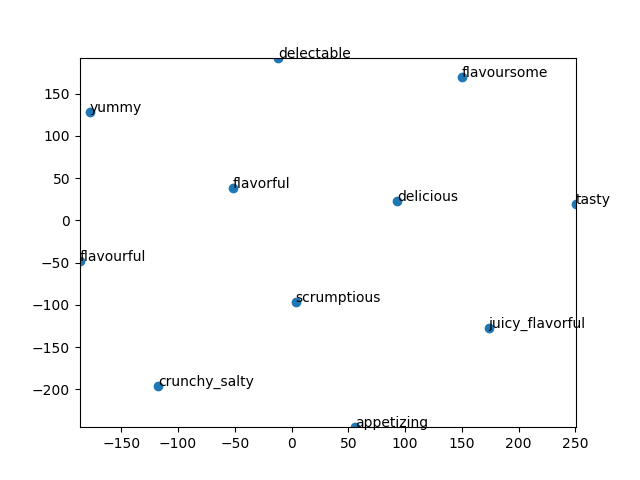

In [9]:
display_closestwords_tsnescatterplot(model, 'tasty')